In [1]:
import numpy as np
import sys
import pandas as pd
sys.path.append('/Users/Ziqi/Desktop/mgwr')
from mgwr.gwr import GWR,MGWR
from mgwr.sel_bw import Sel_BW
import matplotlib.pyplot as plt
%load_ext memory_profiler

/Users/Ziqi/anaconda/lib/python3.5/site-packages/libpysal/io/iohandlers/__init__.py:25: UserWarning: SQLAlchemy and Geomet not installed, database I/O disabled
  warnings.warn('SQLAlchemy and Geomet not installed, database I/O disabled')


### Generating known parameter surfaces of size N=40,000 and k=15 on a 200 by 200 grid

In [2]:
size = 200
n = size*size # Number of observations
k = 15 #Number of Covariates
u = np.array([np.linspace(0, size-1, num=size)]*size).reshape(-1)
v = np.array([np.linspace(0, size-1, num=size)]*size).T.reshape(-1)
coords = np.array(list(zip(u,v)))
bws = np.arange(n/k,n+1,n/k).astype(int)
k = len(bws)
X = np.random.randn(n,len(bws))
y = np.random.randn(n,1)
se = Sel_BW(coords,y,X,multi=True,constant=False)
bws = se.search(multi_bw_min=list(bws),multi_bw_max=list(bws))
betas = (se.params * 100 - 3) * 100
output_betas = pd.DataFrame(np.hstack([coords,betas]),columns=['x_coord','y_coord'] + 
              ['XBeta'+ s for s in list(bws.astype(str))])
output_betas.to_csv("test_betas_"+str(n)+"_"+str(k) + ".csv")

In [30]:
betas = pd.read_csv("test_betas_"+str(40000)+"_"+str(15) + ".csv").iloc[:,3:].values

### Synthesized known surfaces with varying scale

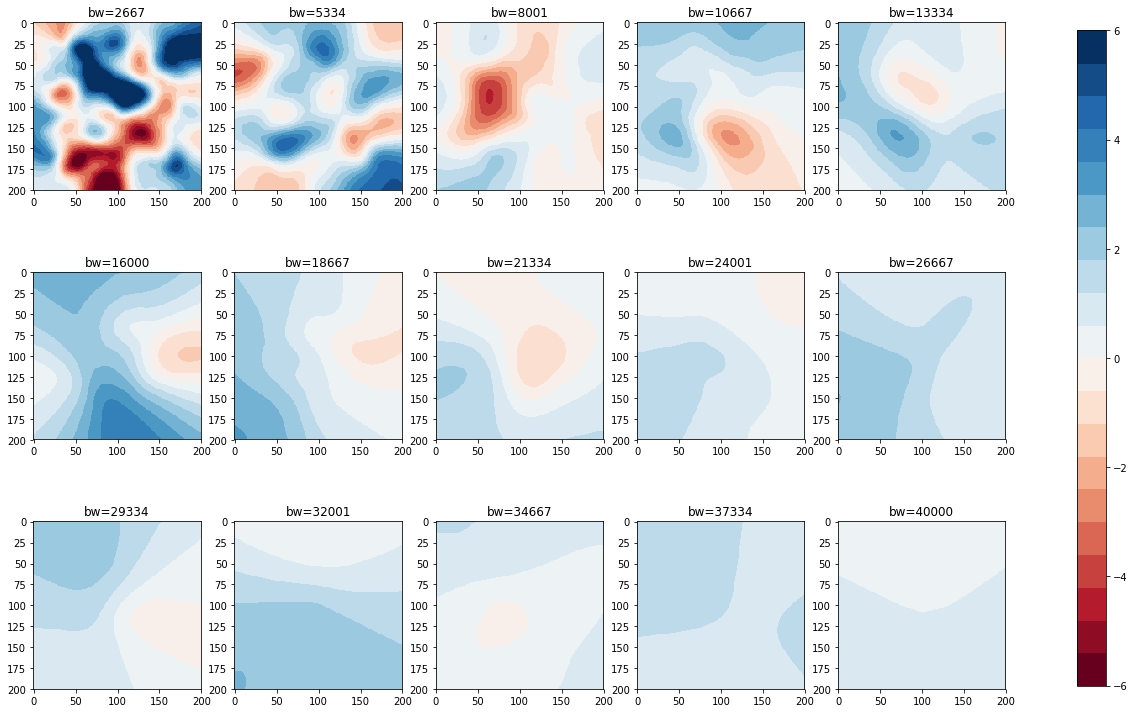

In [32]:
from matplotlib import colors
fig, axs = plt.subplots(3,5, figsize=(20, 13))
axs = axs.ravel()
for i in range(15):
    im = axs[i].imshow((betas[:,i]).reshape(size,size),vmin=-6,vmax=6,
                       cmap = plt.cm.get_cmap('RdBu', 20))
    axs[i].grid(False)
    axs[i].set_title('bw=' + str(bws[i] + 1))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)